In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import metrics
from sklearn import cross_validation
import ggplot as gg

/home/deva/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/deva/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/deva/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/deva/anaconda2/lib/python2.7/site-packages/statsmodels

In [6]:
import matplotlib.pyplot as plt

In [7]:
from ggplot import  *

In [8]:
df_train = pd.read_csv('vill_train_all.csv')
del df_train['Unnamed: 0']
del df_train['Snow and ice']


df_cv = pd.read_csv('vill_cv_all.csv')
del df_cv['Unnamed: 0']
del df_cv['Snow and ice']

In [9]:
def get_dummies(df):
    for label in labels:
        df_ = pd.get_dummies(df[label])
        df_.columns = [label[20:]+'_'+str(i+1) for i in range(len(df[label].unique()))]
        df = pd.concat([df,df_],axis=1)
    return df

In [10]:
labels = ['Village_HHD_Cluster_MSL','Village_HHD_Cluster_MSW','Village_HHD_Cluster_CHH','Village_HHD_Cluster_FC','Village_HHD_Cluster_BF','Village_HHD_Cluster_EMP']

In [11]:
df_train = get_dummies(df_train)

In [12]:
df_train

,State,District,Subdistt,Town/Village,Ward,EB,Level,Name,TRU,ELG_POP,...,CHH_4,FC_1,FC_2,FC_3,BF_1,BF_2,BF_3,EMP_1,EMP_2,EMP_3
0,10,203,1013,215991,0,0,VILLAGE,Tharhi,Rural,2174,...,1,1,0,0,1,0,0,0,1,0
1,10,203,1013,215992,0,0,VILLAGE,Pipra,Rural,1459,...,0,1,0,0,1,0,0,0,1,0
2,10,203,1013,215993,0,0,VILLAGE,Kotaraha,Rural,648,...,0,1,0,0,1,0,0,1,0,0
3,10,203,1013,215994,0,0,VILLAGE,Rampurwa,Rural,3415,...,0,1,0,0,1,0,0,1,0,0
4,10,203,1013,215995,0,0,VILLAGE,Lachhmipur,Rural,1597,...,0,1,0,0,1,0,0,0,1,0
5,10,203,1013,215996,0,0,VILLAGE,Daruabari,Rural,1371,...,0,1,0,0,1,0,0,0,1,0
6,10,203,1013,215997,0,0,VILLAGE,Santpur,Rural,1265,...,0,1,0,0,1,0,0,0,1,0
7,10,203,1013,215998,0,0,VILLAGE,Soharia,Rural,2717,...,0,1,0,0,1,0,0,1,0,0
8,10,203,1013,215999,0,0,VILLAGE,Parsauni,Rural,3882,...,0,1,0,0,1,0,0,0,1,0
9,10,203,1013,216002,0,0,VILLAGE,Shiunaha,Rural,1283,...,0,1,0,0,1,0,0,0,1,0


In [13]:
df_cv = get_dummies(df_cv)

In [14]:
cols=list(df_train)

In [15]:
cols

['State',
 'District',
 'Subdistt',
 'Town/Village',
 'Ward',
 'EB',
 'Level',
 'Name',
 'TRU',
 'ELG_POP',
 'No_HH',
 'BF_RUD',
 'BF_INT',
 'BF_ADV',
 'CHH_RUD',
 'CHH_INT',
 'CHH_ADV',
 'FC_RUD',
 'FC_INT',
 'FC_ADV',
 'MSL_INT',
 'MSL_ADV',
 'MSW_RUD',
 'MSW_INT',
 'MSW_ADV',
 'EMP_AL',
 'EMP_NAL',
 'EMP_UN',
 'Village',
 'Village_HHD_Cluster_MSL',
 'District_HHD_Cluster_MSL',
 'Village_HHD_Cluster_MSW',
 'District_HHD_Cluster_MSW',
 'Village_HHD_Cluster_CHH',
 'District_HHD_Cluster_CHH',
 'Village_HHD_Cluster_FC',
 'District_HHD_Cluster_FC',
 'Village_HHD_Cluster_BF',
 'District_HHD_Cluster_BF',
 'Village_HHD_Cluster_EMP',
 'District_HHD_Cluster_EMP',
 'UID',
 'village_code_2011',
 'DN_0',
 'DN_1',
 'DN_10',
 'DN_11',
 'DN_12',
 'DN_13',
 'DN_14',
 'DN_15',
 'DN_16',
 'DN_17',
 'DN_18',
 'DN_19',
 'DN_2',
 'DN_20',
 'DN_21',
 'DN_22',
 'DN_23',
 'DN_24',
 'DN_25',
 'DN_26',
 'DN_27',
 'DN_28',
 'DN_29',
 'DN_3',
 'DN_30',
 'DN_31',
 'DN_32',
 'DN_33',
 'DN_34',
 'DN_35',
 'DN_36',


In [16]:
var = cols[cols.index('mean'):cols.index('Barren or sparsely vegetated')+1]

In [17]:
nl_cols = cols[cols.index('DN_0'):cols.index('mean')]

In [18]:
var

['mean',
 'sum',
 'Water',
 'Evergreen Needleleaf forest',
 'Evergreen Broadleaf forest',
 'Deciduous Needleleaf forest',
 'Deciduous Broadleaf forest',
 'Mixed forest',
 'Closed shrublands',
 'Open shrublands',
 'Woody savannas',
 'Savannas',
 'Grasslands',
 'Permanent wetlands',
 'Croplands',
 'Urban and built-up',
 'Cropland/Natural vegetation mosaic',
 'Barren or sparsely vegetated']

In [19]:
## finding the area:

In [20]:
def find_Area(df_):
    df_['Area'] = df_[nl_cols].sum(axis=1)
    df_ = df_.loc[df_['Area'] > 0]
    return df_

In [21]:
## building features out of modis data

In [70]:
def modis_newFeature(df_):
    df_['Urban and built-up']=df_['Urban and built-up']+1
    df_['CropRatio']=(df_['Croplands']+df_['Cropland/Natural vegetation mosaic'])/df_['Area']
    df_['AvgUrbanNTL']=df_['sum']/df_['Urban and built-up']
    df_['UrbanRatio']= df_['Urban and built-up']/df_['Area']

    df_['Natural']= 0
    for i in ['Water','Evergreen Needleleaf forest','Evergreen Broadleaf forest','Deciduous Needleleaf forest','Deciduous Broadleaf forest','Mixed forest','Closed shrublands','Open shrublands','Woody savannas','Savannas','Grasslands','Permanent wetlands']:
        df_['Natural']=df_['Natural']+df_[i]

    df_['CropRemainRatio']=(df_['Croplands']+df_['Cropland/Natural vegetation mosaic'])/(df_['Area']-df_['Natural'])
    df_['UrbanRemainRatio']=df_['Urban and built-up']/(df_['Area']-df_['Natural'])
    #df_['UrbanRatio']=df_['UrbanRatio'].fillna(0)
    
    df_['forest'] = df_[modi_var[1:6]].sum(axis=1)
    
    #grass_shrubs consists of shrblands,savansas and grasslands
    df_['grass_shrubs'] = df_[modi_var[6:11]].sum(axis=1)
        
    df_['wet'] = df_[['Water', 'Permanent wetlands']].sum(axis=1)
    for i in modi_var+['Natural','forest','grass_shrubs','wet']:
        df_['mod_'+i]=df_[i]/df_['Area']
    return df_

In [23]:
modi_var = var[2:]

In [24]:
modi_var

['Water',
 'Evergreen Needleleaf forest',
 'Evergreen Broadleaf forest',
 'Deciduous Needleleaf forest',
 'Deciduous Broadleaf forest',
 'Mixed forest',
 'Closed shrublands',
 'Open shrublands',
 'Woody savannas',
 'Savannas',
 'Grasslands',
 'Permanent wetlands',
 'Croplands',
 'Urban and built-up',
 'Cropland/Natural vegetation mosaic',
 'Barren or sparsely vegetated']

In [71]:
df_train = find_Area(df_train)
df_train = modis_newFeature(df_train)

df_cv = find_Area(df_cv)
df_cv = modis_newFeature(df_cv)

In [26]:
df_train['Area'].describe()

count    92208.000000
mean         2.164476
std          4.279691
min          0.003495
25%          0.609247
50%          1.288503
75%          2.570167
max        709.454133
Name: Area, dtype: float64

In [27]:
cols = df_train.columns.tolist()

In [28]:
cols

['State',
 'District',
 'Subdistt',
 'Town/Village',
 'Ward',
 'EB',
 'Level',
 'Name',
 'TRU',
 'ELG_POP',
 'No_HH',
 'BF_RUD',
 'BF_INT',
 'BF_ADV',
 'CHH_RUD',
 'CHH_INT',
 'CHH_ADV',
 'FC_RUD',
 'FC_INT',
 'FC_ADV',
 'MSL_INT',
 'MSL_ADV',
 'MSW_RUD',
 'MSW_INT',
 'MSW_ADV',
 'EMP_AL',
 'EMP_NAL',
 'EMP_UN',
 'Village',
 'Village_HHD_Cluster_MSL',
 'District_HHD_Cluster_MSL',
 'Village_HHD_Cluster_MSW',
 'District_HHD_Cluster_MSW',
 'Village_HHD_Cluster_CHH',
 'District_HHD_Cluster_CHH',
 'Village_HHD_Cluster_FC',
 'District_HHD_Cluster_FC',
 'Village_HHD_Cluster_BF',
 'District_HHD_Cluster_BF',
 'Village_HHD_Cluster_EMP',
 'District_HHD_Cluster_EMP',
 'UID',
 'village_code_2011',
 'DN_0',
 'DN_1',
 'DN_10',
 'DN_11',
 'DN_12',
 'DN_13',
 'DN_14',
 'DN_15',
 'DN_16',
 'DN_17',
 'DN_18',
 'DN_19',
 'DN_2',
 'DN_20',
 'DN_21',
 'DN_22',
 'DN_23',
 'DN_24',
 'DN_25',
 'DN_26',
 'DN_27',
 'DN_28',
 'DN_29',
 'DN_3',
 'DN_30',
 'DN_31',
 'DN_32',
 'DN_33',
 'DN_34',
 'DN_35',
 'DN_36',


In [29]:
idx_enforest = cols.index('Evergreen Needleleaf forest')

In [30]:
idx_perWetLands = cols.index('Permanent wetlands')

In [ ]:
cols

In [ ]:
def rearrange_cols(df_):
    idx_uid = cols.index('UID')
    idx_mean = cols.index('mean')
    idx_area = cols.index('Area')
    idx_msl1 = cols.index('MSL_1')
    cols_rearranged = cols[idx_uid:idx_uid+2] + cols[:idx_uid] + cols[idx_uid+2:idx_mean] + ['Area'] + cols[idx_mean:idx_msl1]+  cols[idx_area+1:] + cols[idx_msl1:idx_area]

    df_ = df_[cols_rearranged]
    return df_

In [ ]:
df_train = rearrange_cols(df_train)
df_cv = rearrange_cols(df_cv)

In [ ]:
cols = df_train.columns.tolist()

In [ ]:
cols

In [69]:
var = ['mean',
 'sum',
 'Croplands',
 'Urban and built-up',
 'Cropland/Natural vegetation mosaic',
 'Barren or sparsely vegetated',
 'CropRatio',
 'AvgUrbanNTL',
 'UrbanRatio',
 'Natural',
 'CropRemainRatio',
 'UrbanRemainRatio',
 'forest',
 'grass_shrubs',
 'mod_Croplands',
 'mod_Urban and built-up',
 'mod_Cropland/Natural vegetation mosaic',
 'mod_Barren or sparsely vegetated',
 'mod_forest',
 'mod_grass_shrubs',
 'mod_Natural']

In [ ]:
#var = cols[cols.index('mean'):cols.index('MSL_1')]

In [65]:
X_train = df_train[var].values
X_cv = df_cv[var].values

In [35]:
labels = cols[cols.index('MSL_1'):cols.index('Area')]

In [36]:
labels

['MSL_1',
 'MSL_2',
 'MSL_3',
 'MSW_1',
 'MSW_2',
 'MSW_3',
 'CHH_1',
 'CHH_2',
 'CHH_3',
 'CHH_4',
 'FC_1',
 'FC_2',
 'FC_3',
 'BF_1',
 'BF_2',
 'BF_3',
 'EMP_1',
 'EMP_2',
 'EMP_3']

In [37]:
df = pd.DataFrame(columns=['accuracy','f1_score','recall','precision'])
for label in labels:
    y_train = df_train[label]
    y_cv = df_cv[label]

    model = xgb.XGBClassifier()
    fit = model.fit(X_train,y_train)
    y_pred = fit.predict(X_cv)

    accuracy = metrics.accuracy_score(y_cv,y_pred)
    f1 = metrics.f1_score(y_cv,y_pred)
    recall_ = metrics.recall_score(y_cv,y_pred)
    precision_ = metrics.precision_score(y_cv,y_pred)
    
    print label
    #print metrics.confusion_matrix(y_cv,y_pred)
    print
    
    df.loc[label] = [accuracy,f1,recall_,precision_]

MSL_1

MSL_2

MSL_3

MSW_1

MSW_2

MSW_3

CHH_1

CHH_2

CHH_3

CHH_4

FC_1

FC_2



/home/deva/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/deva/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


FC_3

BF_1

BF_2

BF_3

EMP_1

EMP_2

EMP_3



In [38]:
df.sort_values(by='f1_score',ascending=False)

,accuracy,f1_score,recall,precision
BF_1,0.796803,0.886900,0.999204,0.797290
FC_1,0.680496,0.807613,0.981146,0.686240
MSW_2,0.573143,0.665844,0.846068,0.548917
EMP_1,0.531093,0.584768,0.756300,0.476660
MSL_1,0.537926,0.522352,0.729996,0.406675
MSL_3,0.675838,0.460564,0.316241,0.847204
EMP_2,0.549417,0.338302,0.249402,0.525685
MSW_3,0.713465,0.213991,0.134508,0.523092
CHH_3,0.663132,0.070235,0.039536,0.314235
FC_2,0.746216,0.043579,0.023051,0.398252


In [62]:
label = 'MSW_2'

In [67]:
y_train = df_train[label]
y_cv = df_cv[label]

model = xgb.XGBClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_cv)

accuracy = metrics.accuracy_score(y_cv,y_pred)
f1 = metrics.f1_score(y_cv,y_pred)
recall_ = metrics.recall_score(y_cv,y_pred)
precision_ = metrics.precision_score(y_cv,y_pred)

print label
#print metrics.confusion_matrix(y_cv,y_pred)
print


MSW_2



In [68]:
f1

0.6528265449438202

In [54]:
model.feature_importances_

array([ 0.18906942,  0.04135894,  0.03249631,  0.        ,  0.00590842,
        0.        ,  0.03249631,  0.02363368,  0.03545052,  0.02067947,
        0.16100442,  0.02363368,  0.03545052,  0.03988183,  0.18316101,
        0.03692762,  0.12850812,  0.01033973], dtype=float32)

In [ ]:
x = df_train[labels[3]]

In [ ]:
y = df_train['mod_Water']

In [ ]:
df_train['mod_Water'].describe()

In [ ]:
df_train['mean'].describe()

In [ ]:
plt.hist(df_train['mod_Water'])

In [ ]:
ggplot(df_train,aes(x='mean')) + geom_histogram(binwidth=0.1)

In [ ]:
ggplot(df_train,aes(x=labels[18],y='mean')) + geom_boxplot()#+ylim(0,0.2)

In [ ]:
cols

In [ ]:
labels = ['Village_HHD_Cluster_MSL','Village_HHD_Cluster_MSW','Village_HHD_Cluster_CHH','Village_HHD_Cluster_FC','Village_HHD_Cluster_BF','Village_HHD_Cluster_EMP']

In [1]:
mod_features = ['mean',
 'sum',
 'Water',
 'Permanent wetlands',
 'Croplands',
 'Urban and built-up',
 'Cropland/Natural vegetation mosaic',
 'CropRatio',
 'AvgUrbanNTL',
 'UrbanRatio',
 'Natural',
 'CropRemainRatio',
 'UrbanRemainRatio',
 'forest',
 'grass_shrubs',
 'mod_Water',
 'mod_Permanent wetlands',
 'mod_Croplands',
 'mod_Urban and built-up',
 'mod_Cropland/Natural vegetation mosaic',
 'mod_forest',
 'mod_grass_shrubs',
 'mod_Natural',
 'wet',
 'mod_wet']

In [31]:
mod_features

['mean',
 'sum',
 'Water',
 'Permanent wetlands',
 'Croplands',
 'Urban and built-up',
 'Cropland/Natural vegetation mosaic',
 'Barren or sparsely vegetated',
 'CropRatio',
 'AvgUrbanNTL',
 'UrbanRatio',
 'Natural',
 'CropRemainRatio',
 'UrbanRemainRatio',
 'forest',
 'grass_shrubs',
 'mod_Water',
 'mod_Permanent wetlands',
 'mod_Croplands',
 'mod_Urban and built-up',
 'mod_Cropland/Natural vegetation mosaic',
 'mod_Barren or sparsely vegetated',
 'mod_forest',
 'mod_grass_shrubs',
 'mod_Natural',
 'wet',
 'mod_wet']

In [32]:
label = labels[0]

In [33]:
label

'Village_HHD_Cluster_MSL'

In [ ]:
df_train['mean'].quantile(.975)

In [ ]:
mod_features

In [39]:
from sklearn import preprocessing

In [43]:
df_train_new = preprocessing.scale(df_train[mod_features].values)

In [44]:
df_train_new = pd.DataFrame(df_train_new,columns=mod_features)

In [46]:
df_train_new[label] = df_train[label]

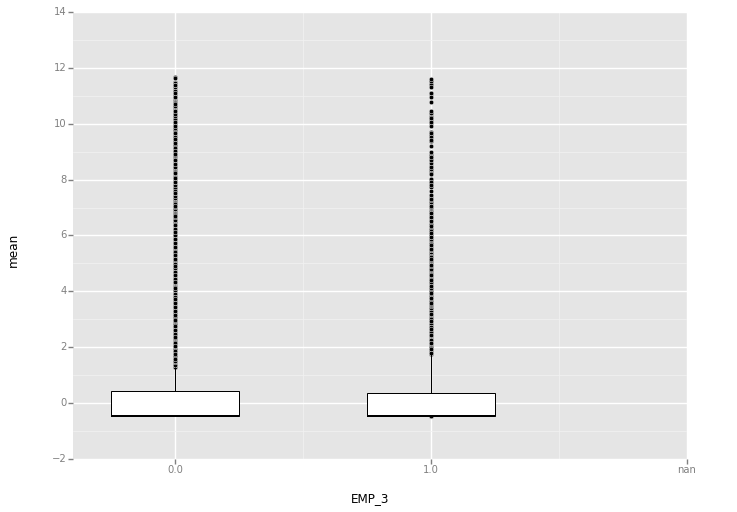

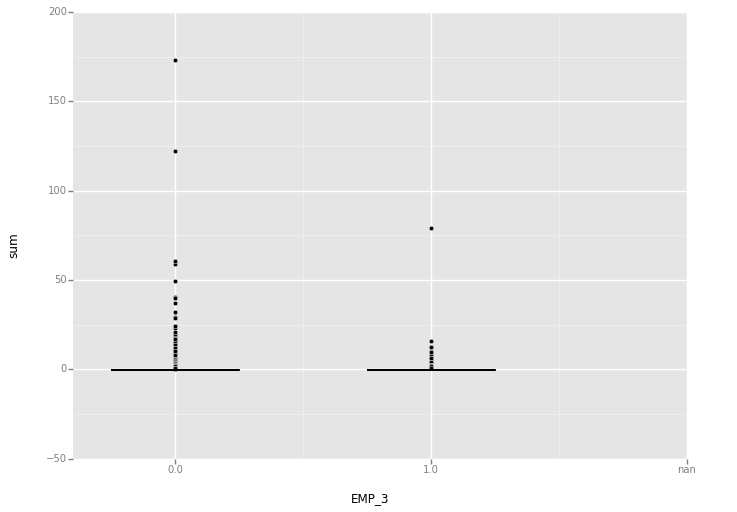

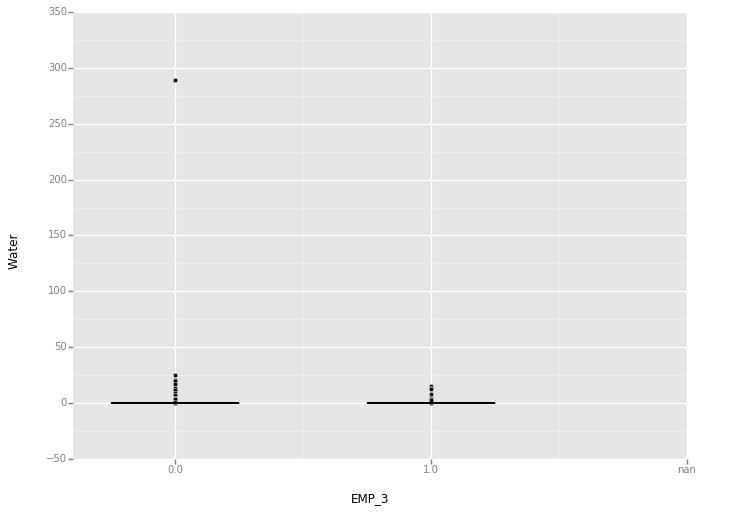

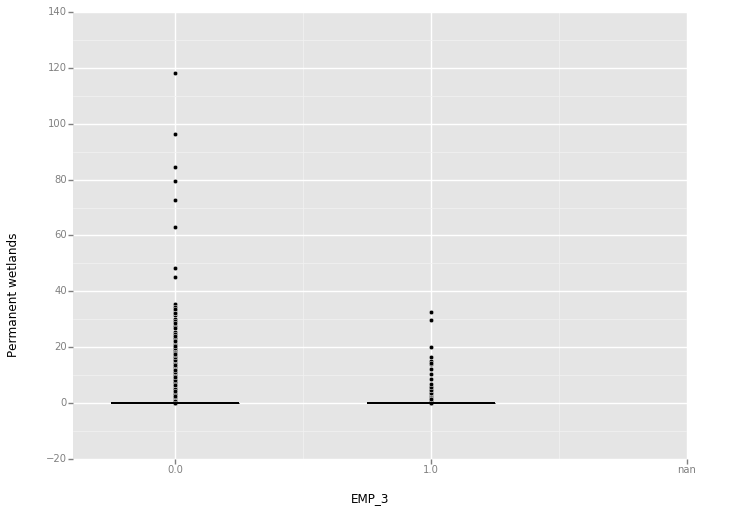

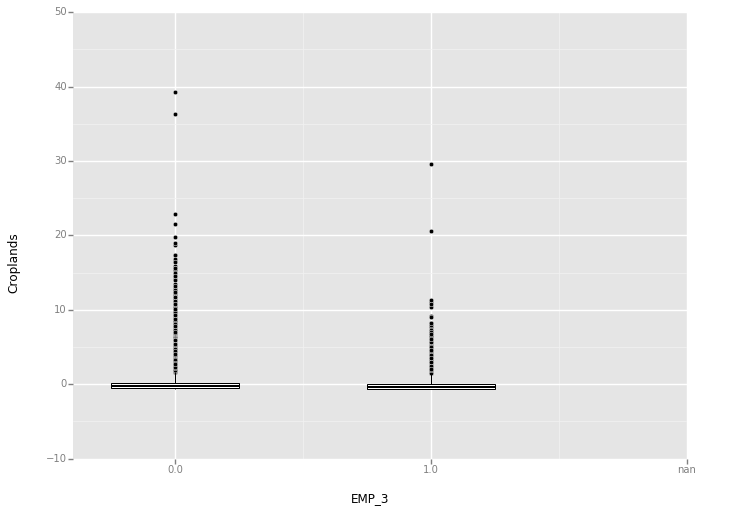

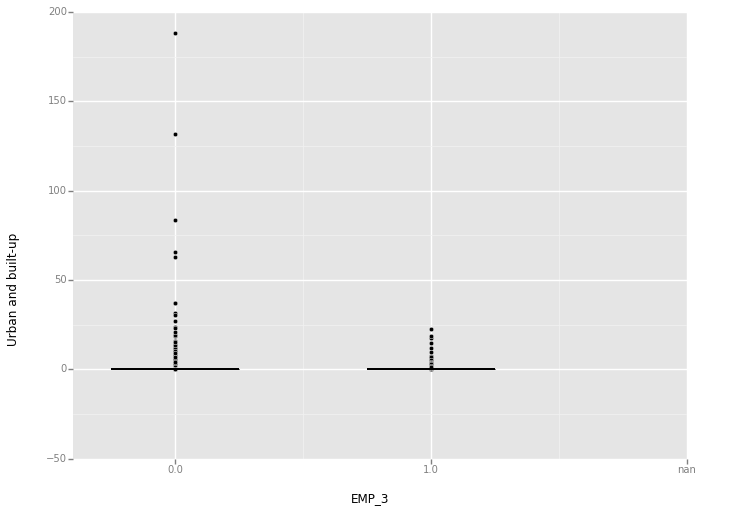

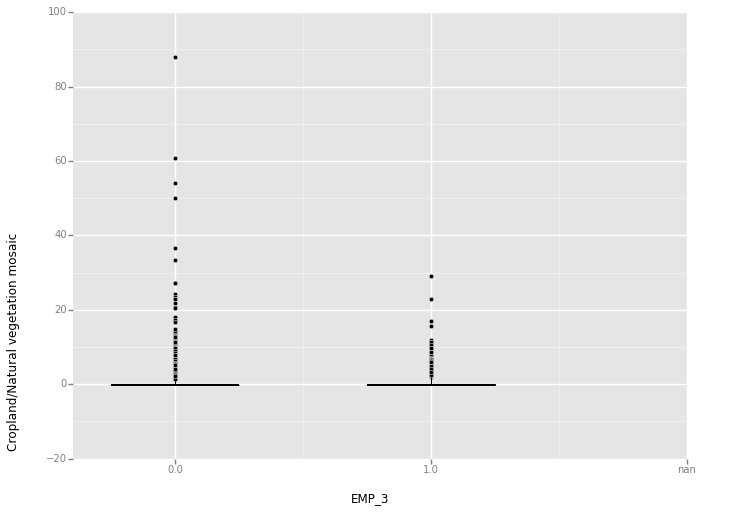

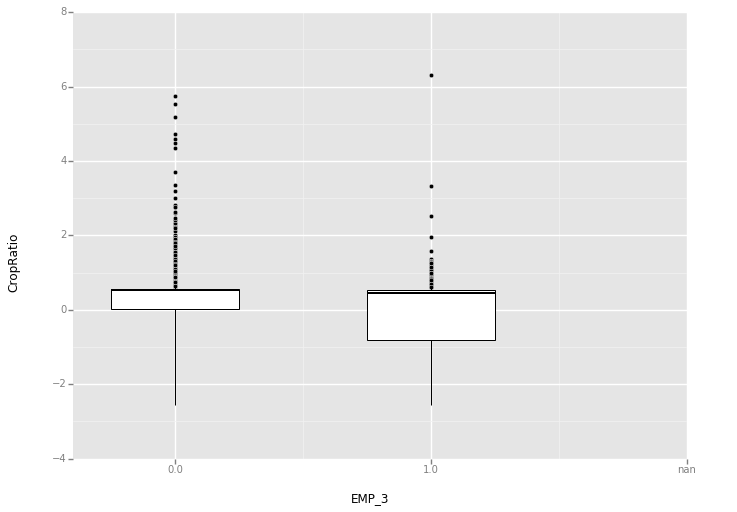

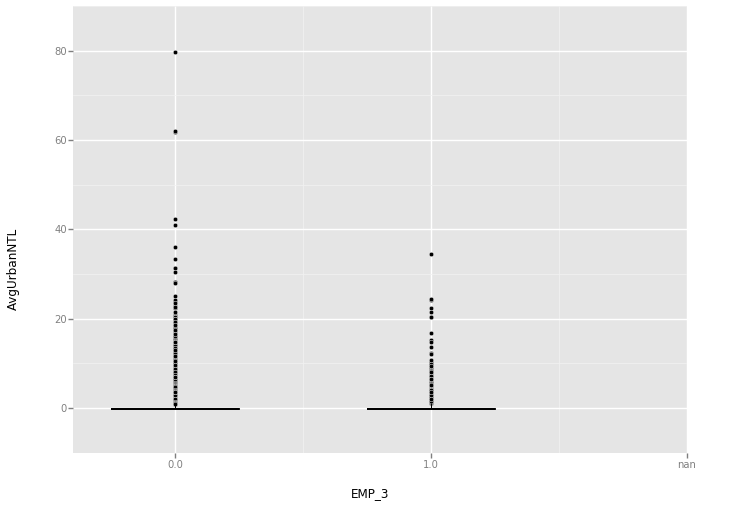

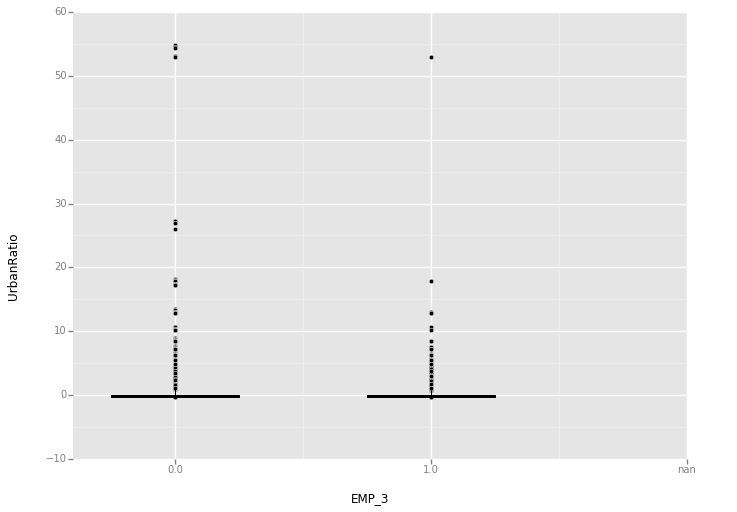

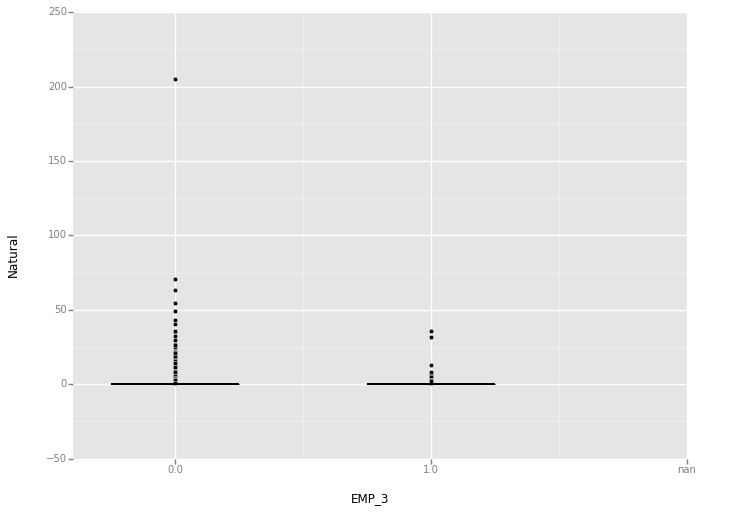

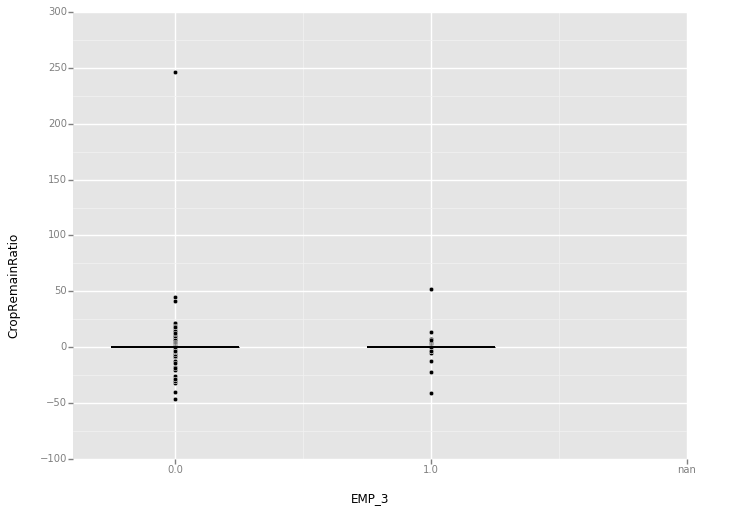

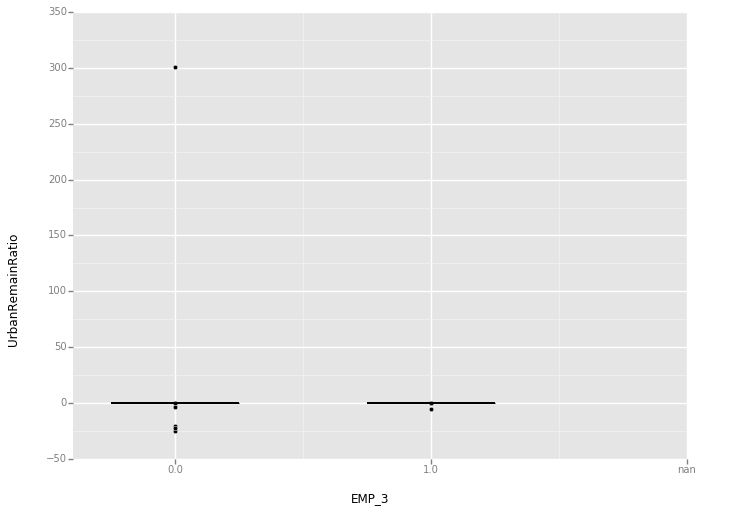

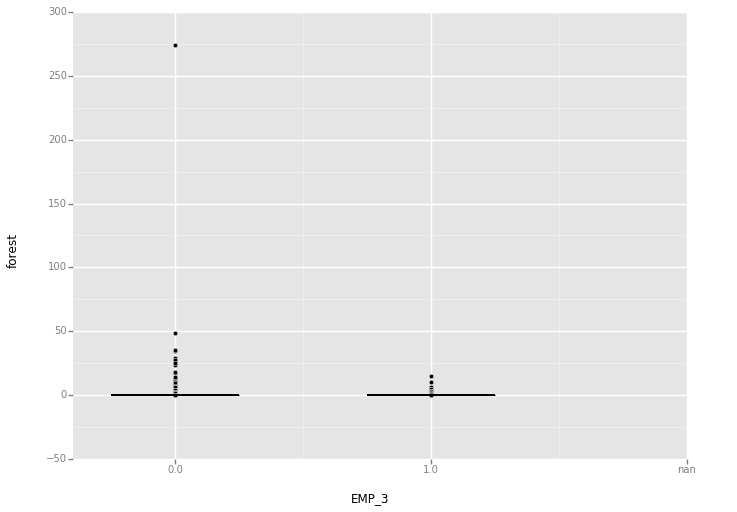

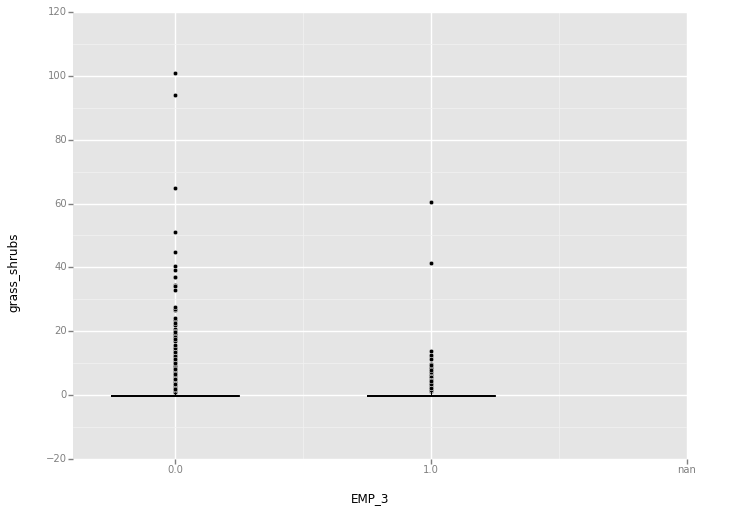

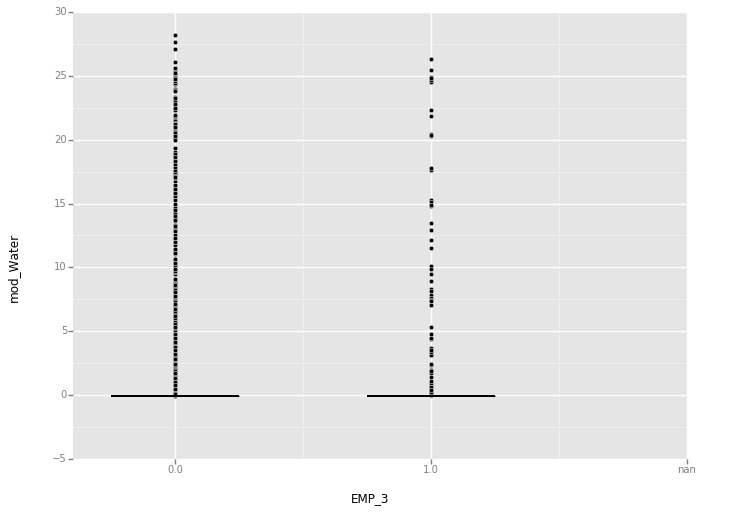

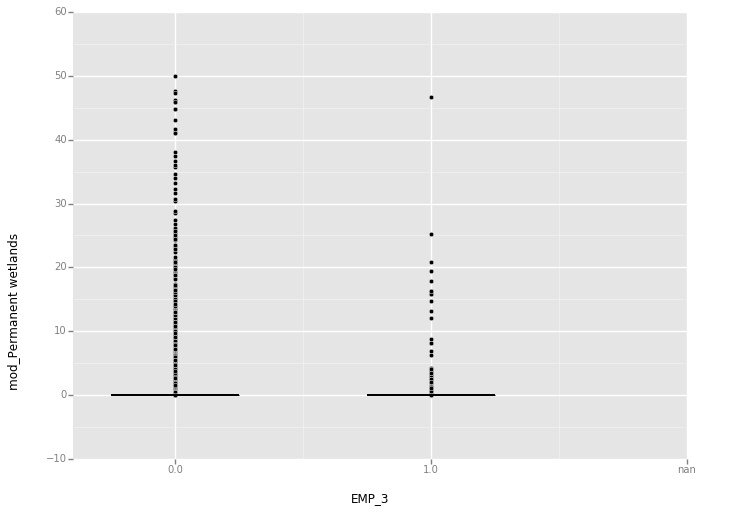

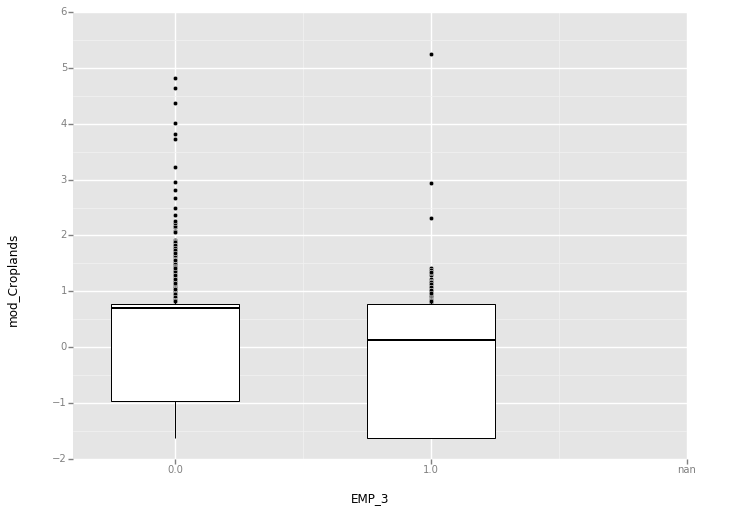

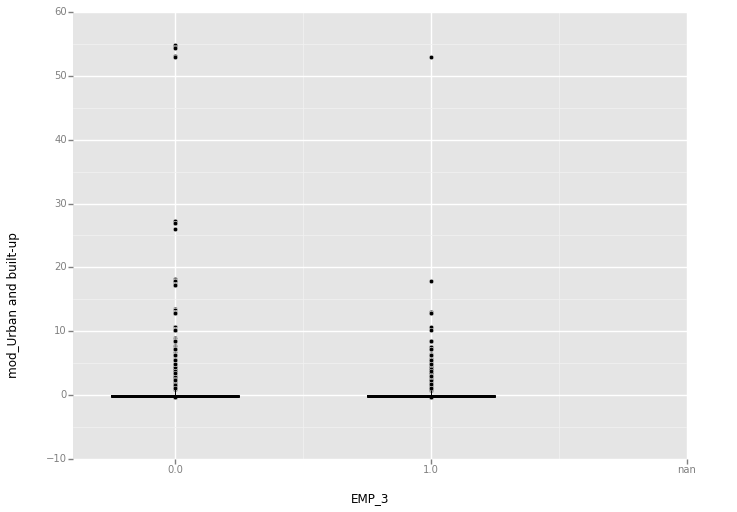

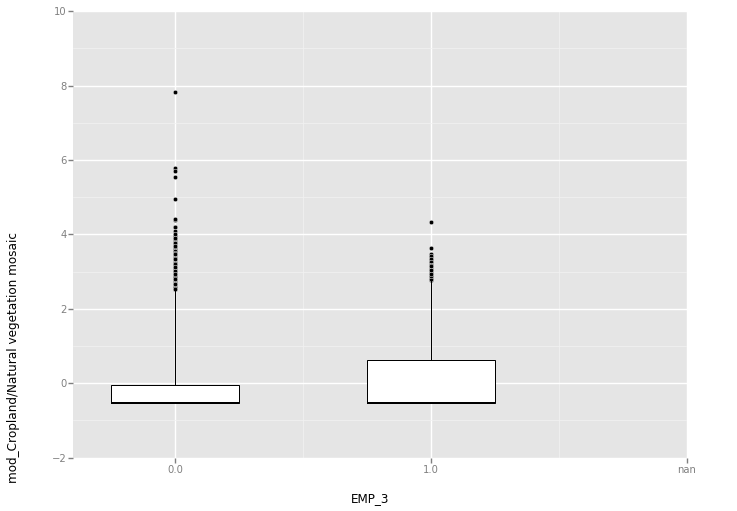

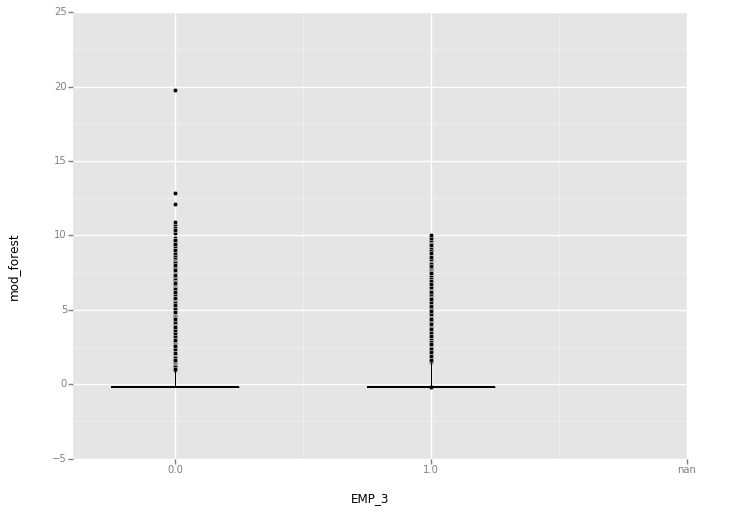

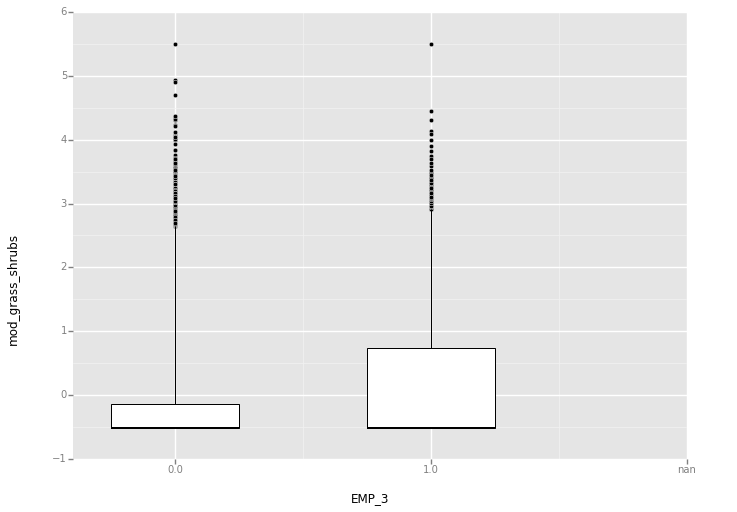

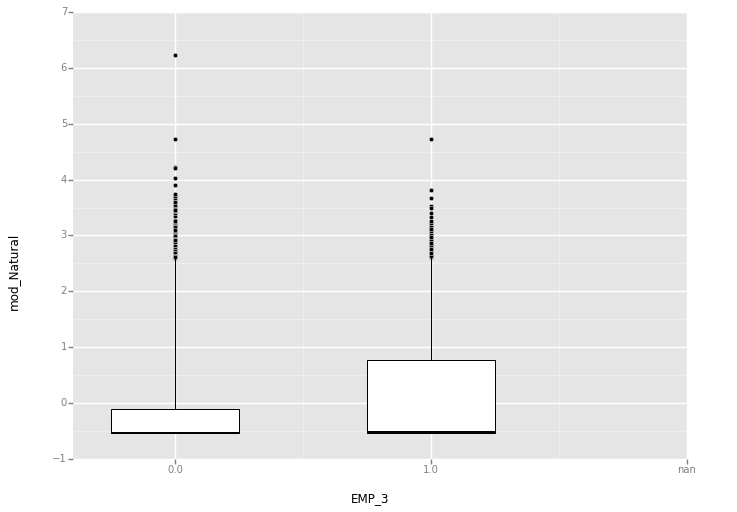

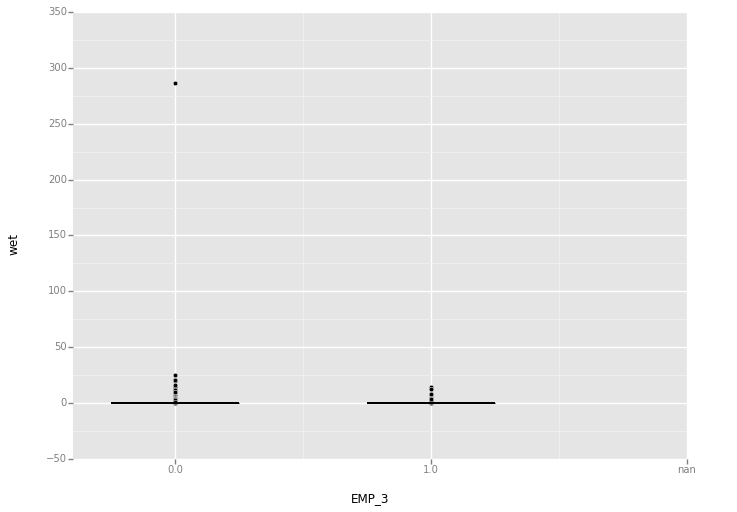

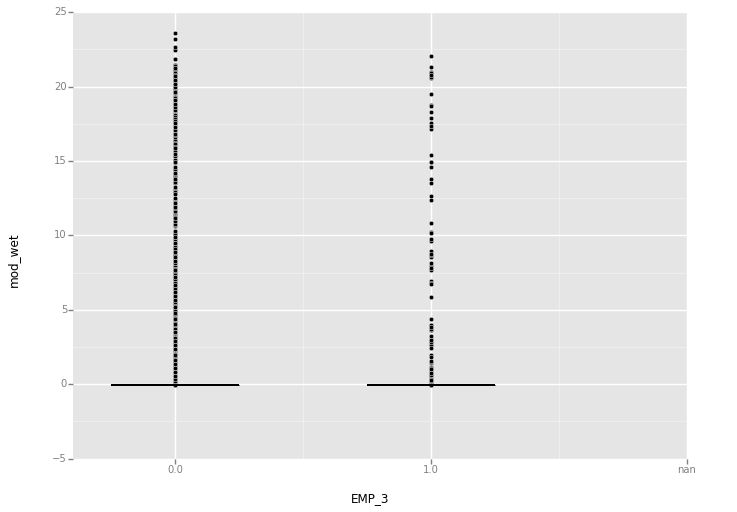

In [48]:
for feature in mod_features:
    plot = ggplot(df_train_new,aes(x=label,y=feature)) + geom_boxplot()
    plot.show()

In [37]:
df_train['Natural'].describe()

count    92208.000000
mean         0.460323
std          2.983744
min          0.000000
25%          0.000000
50%          0.000000
75%          0.234743
max        613.413300
Name: Natural, dtype: float64

In [40]:
df_train['Natural'].quantile(0.9)

1.2465762625000003

In [ ]:
label

In [ ]:
plot = ggplot(df_train,aes(x=label,y=feature)) + geom_boxplot()+ylim(df_train[feature].quantile(.025),df_train[feature].quantile(.975))

In [ ]:
df_train[feature]

In [ ]:
plt.box(x,y)
plt.show()

In [ ]:
plt.boxplot(x)
plt.show()

In [ ]:
labels[3]

In [ ]:
var

In [ ]:
xgb.XGBClassifier(max_depth=7)

In [ ]:
y_pred[y_pred == 1]

In [ ]:
np.shape(df_train)

In [ ]:
np.shape(df_cv)

In [ ]:
label = 'EMP_2'

In [ ]:
df2 = pd.DataFrame(columns=['accuracy','f1_score','recall','precision'])

In [ ]:
y_train = processY(df_train[label]).values
y_cv = processY(df_cv[label]).values

model = xgb.XGBClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_cv)

accuracy = metrics.accuracy_score(y_cv,y_pred)
f1 = metrics.f1_score(y_cv,y_pred)
recall_ = metrics.recall_score(y_cv,y_pred)
precision_ = metrics.precision_score(y_cv,y_pred)

df2.loc[label] = [accuracy,f1,recall_,precision_]

In [ ]:
metrics.accuracy_score(y_cv,y_pred)

In [ ]:
df2

In [ ]:
len(y_pred[y_pred==1])

In [ ]:
len(y_cv[y_cv==1])

In [ ]:
pd.get_dummies(y_train)

In [ ]:
df_ = pd.get_dummies(df_train[label])
df_.columns = [label[20:]+'_'+str(i+1) for i in range(len(df_train[label].unique()))]

In [ ]:
df_train = pd.concat([df_train,df_],axis=1)